<a href="https://colab.research.google.com/github/WoongjinYang/DAP__/blob/main/Eternal_Return.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Eternal Return 

'아크베어즈' 에서 2015년 11월 12일에 출시했던 모바일 게임 "블랙서바이벌" 은 배틀로얄 장르의 게임으로 최대 10명이 한 게임에 참가하여 최후의 생존자를 가리는 게임이다.
이를 '님블뉴런' 에서 18인 쿼터뷰 배틀로얄 형식으로 계승하여 출시한 것이 "영원회귀:블랙서바이벌" 이었으며 2020년 10월 14일에 Steam 에서 얼리액세스를 출시한 것이 이 게임의 시작이었다.  

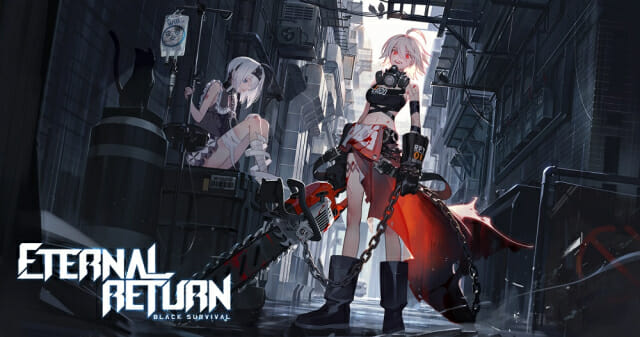

전작의 숙련도, 제작, 파밍 등의 시스템을 가져오며 파밍 루트를 임의로 설정할 수 있는 등 편의성을 개선하여 전작의 높은 진입장벽을 해소했다. 그 밖에 무기 스킬, 하이퍼루프, 낮과 밤 시야 등 기존의 FPS, TPS 에서만 국한되어있던 배틀로얄 장르를 쿼터뷰 형식으로 만든 것이 참신하다고 생각한다. 


---

얼리액세스 출시 이후 동접자 수 1만 ~ 2만 명 정도를 기록하며 나쁘지 않은 성적을 보여줬다. Twitch 등 인터넷 방송에서 한창 유입됐을 때는 5만 명 까지 오른 적도 있었다.


# 얼리액세스부터, 지금까지

이 게임을 처음 접했던 건 20년 11월 즈음이었다. 롤이 질릴 즈음에, 같이하던 친구들이 재밌는 게임을 찾았다며 권유했었을때였다. 처음 해봤을 때는 어렵고 뭐가뭔지 몰라서 힘들었는데 (다행히 루트 공유 시스템이 있었기에 그냥 따라하면 됐었다.) 해보면 해볼수록 되게 신선하고 재밌는 게임임을 느꼈었다. 
그렇게 방학내내 붙들고 살았었다. 랭크 게임이 나오고 비록 시즌 초였지만 in1000 도 찍어봤었다. 관련 커뮤니티를 들락거리며 공략을 보고, 루트를 직접 짜보며 게임을 즐겼다. 

물론 좋은 점만 있었던 것은 아니었다. 실험체 간의 밸런스, 같은 플레이의 반복, '없데이트' 등 여러 가지 문제점을 느꼈고, 최대 동접 5만을 찍었었던 게임은 어느새 2만, 1만으로 떨어지며 커뮤니티에서도 이런 문제들에 대해 해결을 촉구했었다. 흥미가 떨어져버린 나는 "블서" 를 접었었고, 다시 다른 게임을 했다. 

얼마전, 또 할 게임이 없어져버린 우리는 다시 한 번 블서에 들어가봤다. 4시즌이 끝나고, 프리시즌을 맞이한 블서는 기억과 달리 많이 바뀌었었다. 전작에도 있었던 특성 시스템이 생겼으며 신규 아이템, 실험체 들이 정말 많이 나왔다. 또 접었을 동안 계속 지적되었던 여러 문제점 들도 많이 해결되어 진입장벽도 많이 해소된 것 같다. 물론 유입이 적어 동접자 수가 그 전과 비슷하긴 하지만, 이젠 나름 고정 유저층도 생기고 게임이 안정되었다는것을 느꼈다.

"블서" 는 하나의 '나작겜' 이었다. 지금은 광고도 하고 이름이 꽤 알려졌지만,  마이너했었던 그 시절 게임은 아직도 잊지 못한다. 나름 1년 정도를 같이한 이 게임을 다시 돌아보며 무슨 일이 있었는지 되살려볼 것이다. 

In [10]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import interpolate
from dateutil.parser import parse 

# 1년 동안, 동접자 수 변화

(2020/10/14) ~ (2021/12/09) 까지의 일일 접속자 수 변화.    출처 : https://steamdb.info/app/1049590/graphs/

In [11]:
url = "https://raw.githubusercontent.com/WoongjinYang/DAP__/main/eternal_return_All.csv"
chartAll = pd.read_csv(url, parse_dates=['DateTime'])

chartAll = chartAll[chartAll['DateTime'] >= '2020-10-14'] # 2020/10/14 ~ 2021/12/09 를 제외한 데이터 삭제
print(chartAll)

      DateTime  Players  Twitch_Viewers  Flags
432 2020-10-14   3290.0             764    NaN
433 2020-10-15   3142.0            1237    NaN
434 2020-10-16   3763.0           10472    NaN
435 2020-10-17   4387.0            5358    NaN
436 2020-10-18   4770.0            4999    NaN
..         ...      ...             ...    ...
849 2021-12-05   9200.0            2130    NaN
850 2021-12-06   8760.0            2872    NaN
851 2021-12-07   8840.0            1765    NaN
852 2021-12-08   8745.0            1949    NaN
853 2021-12-09  10642.0            4694    NaN

[422 rows x 4 columns]


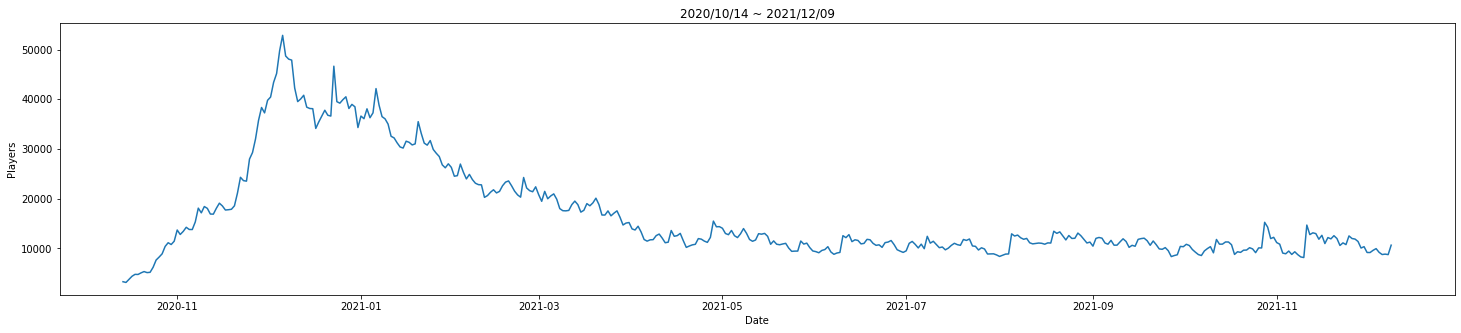

In [12]:
fig = plt.figure(figsize=(25, 5))
ax = fig.add_subplot(1, 1, 1)

x_values = chartAll['DateTime'] # DateTime 을 시계열 타입으로 변환
y_values = chartAll['Players']

plt.plot(x_values, y_values) 
plt.title("2020/10/14 ~ 2021/12/09")
plt.xlabel("Date")
plt.ylabel("Players")

plt.show()

Twitch 시청자 수 변화.

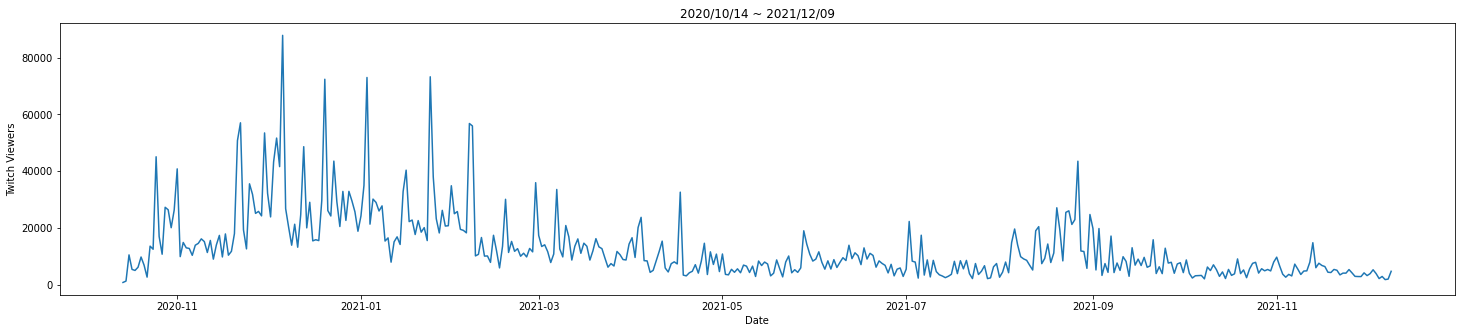

In [13]:
fig = plt.figure(figsize=(25, 5))
ax = fig.add_subplot(1, 1, 1)

x_values = chartAll['DateTime'] # DateTime 을 시계열 타입으로 변환
y_values = chartAll['Twitch_Viewers']

plt.plot(x_values, y_values) 
plt.title("2020/10/14 ~ 2021/12/09")
plt.xlabel("Date")
plt.ylabel("Twitch Viewers")

plt.show()

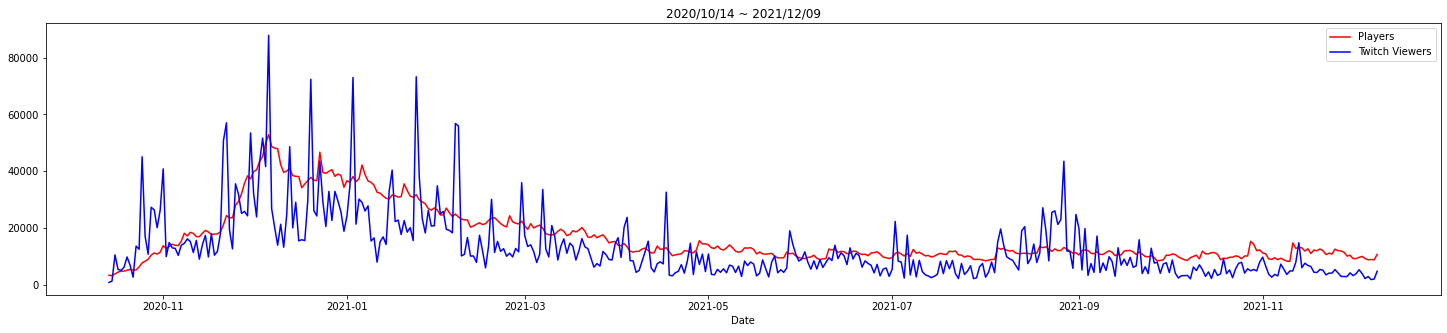

In [14]:
fig = plt.figure(figsize=(25, 5))
ax = fig.add_subplot(1, 1, 1)

x_values = pd.to_datetime(chartAll['DateTime']) # DateTime 을 시계열 타입으로 변환
y_values_p = chartAll['Players']
y_values_t = chartAll['Twitch_Viewers']

plt.plot(x_values, y_values_p, color='red') 
plt.plot(x_values, y_values_t, color='blue')

plt.legend(['Players', 'Twitch Viewers'])

plt.title("2020/10/14 ~ 2021/12/09")
plt.xlabel("Date")

plt.show()

# 대회와 시청자 수, 접속자수

In [15]:
chartAll.loc[chartAll['Players'].idxmax()]

DateTime          2020-12-06 00:00:00
Players                         52853
Twitch_Viewers                  87817
Flags                             NaN
Name: 485, dtype: object

2020/12/06 때 53,000명 가량으로 가장 높은 동접자 수와 88,000명 가량의 Twitch 시청자 수를 기록했다.

---

12월 6일날 Twitch 에서 관련하여 뭐가 있었는지 찾아본 결과,

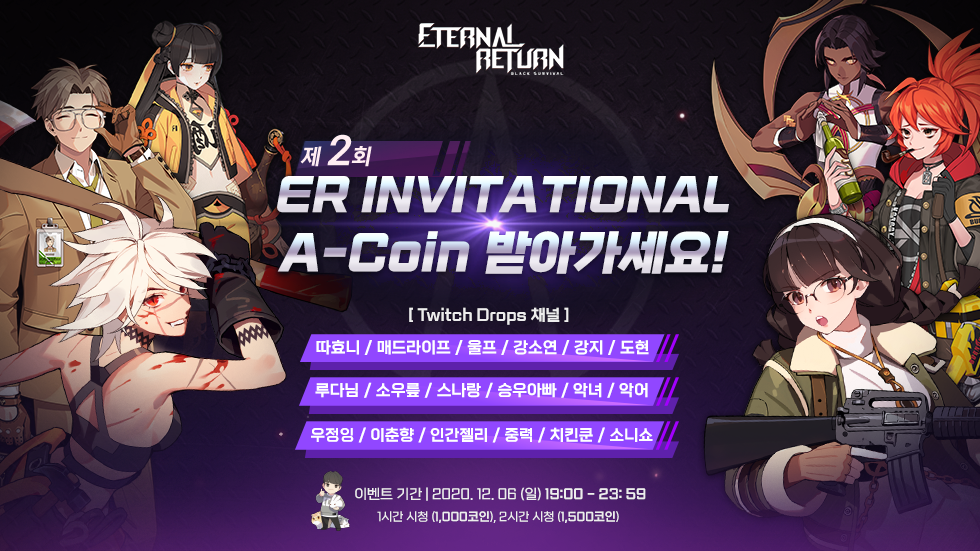

님블뉴런 공식대회였던 "따효니배 ER 인비테이셔널" 제 2회가 열린 날이었다. 

제 2회 대회는 스트리밍으로 본 기억이 있다. 제 1회도 나름 선방했었으나 얼리액세스 출시 후 얼마 지나지 않아서 연 것이라 아는 사람들이 별로 없었다. 하지만 '따효니', '울프', '매드라이프' 등 유명 스트리머들이 참여하기 시작하면서 점점 Twitch 에서도 입소문을 타기 시작했고, 대회 때 마다 시청자 수가 늘어났었다. 그리하여 제 2회 때는 최고 시청자 수를 기록하면서 게임에도 유입이 대폭 늘었다. 


시청자 수가 4만명 이상이었던 때를 찾아보면

In [16]:
chartTwitch = chartAll.loc[chartAll['Twitch_Viewers'] >= 40000]
print(chartTwitch)

      DateTime  Players  Twitch_Viewers  Flags
443 2020-10-25   7650.0           45041    NaN
450 2020-11-01  13690.0           40777    NaN
470 2020-11-21  21107.0           50730    NaN
471 2020-11-22  24295.0           57008    NaN
479 2020-11-30  37256.0           53440    NaN
482 2020-12-03  43386.0           43190    NaN
483 2020-12-04  45175.0           51630    NaN
484 2020-12-05  49745.0           41568    NaN
485 2020-12-06  52853.0           87817    NaN
492 2020-12-13  40800.0           48592    NaN
499 2020-12-20  37790.0           72351    NaN
502 2020-12-23  46650.0           43513    NaN
513 2021-01-03  38071.0           72972    NaN
526 2021-01-16  31562.0           40325    NaN
534 2021-01-24  31689.0           73222    NaN
547 2021-02-06  24880.0           56762    NaN
548 2021-02-07  23833.0           55897    NaN
749 2021-08-27  13077.0           43478    NaN


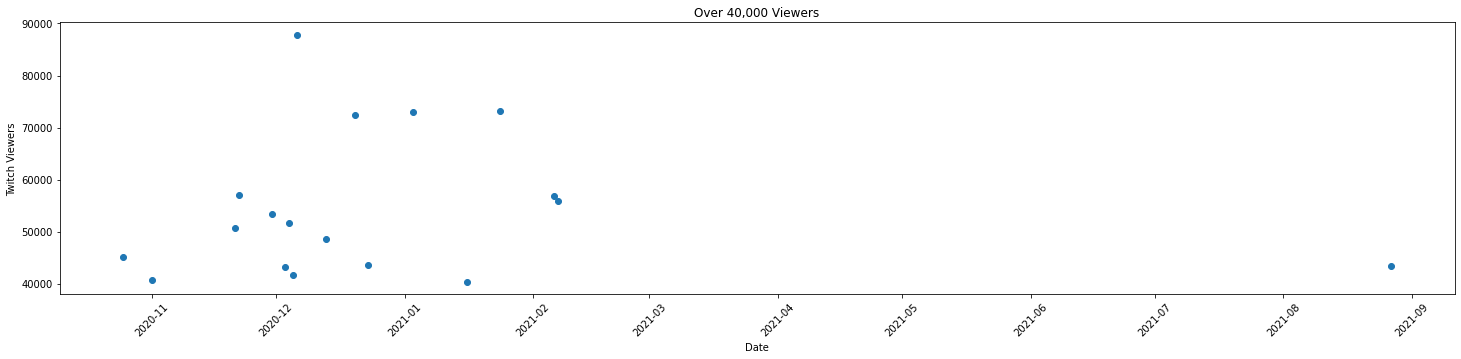

In [17]:
fig = plt.figure(figsize=(25, 5))
ax = fig.add_subplot(1, 1, 1)

plt.scatter(chartTwitch['DateTime'], chartTwitch['Twitch_Viewers'])

plt.title("Over 40,000 Viewers")
plt.xlabel("Date")
plt.ylabel("Twitch Viewers")
plt.xticks(rotation=45)

plt.show()

시청자 수 경향성, 계절성 분석

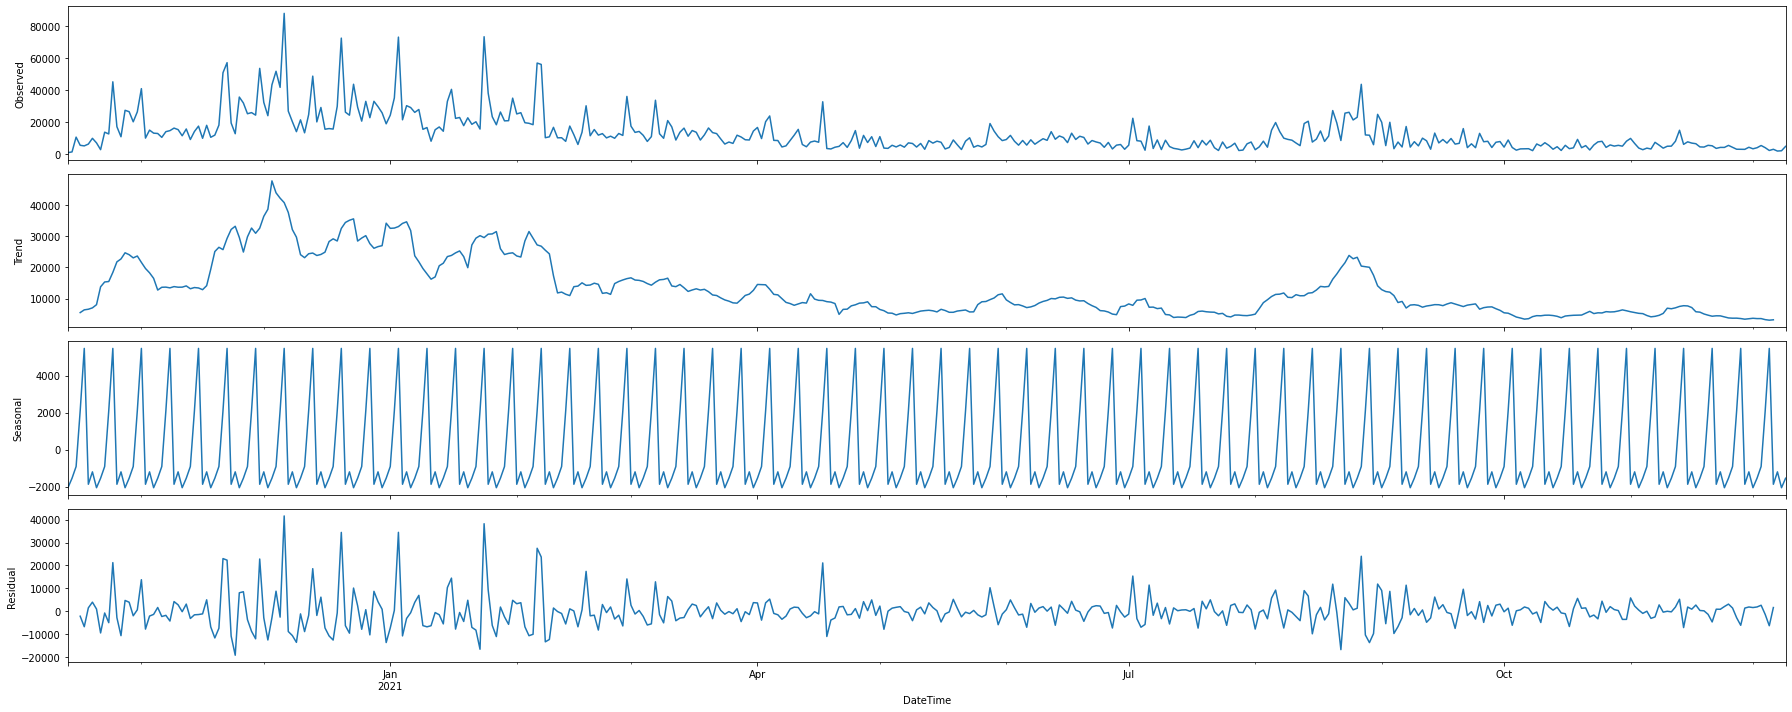

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

chartAll['DateTime'] = pd.to_datetime(chartAll['DateTime'])
chartAll = chartAll.set_index('DateTime')
result = seasonal_decompose(chartAll.Twitch_Viewers) # Twitch_Viewers 항목으로 분석

plt.rcParams.update({'figure.figsize': (25,10)})
result.plot()
plt.show()

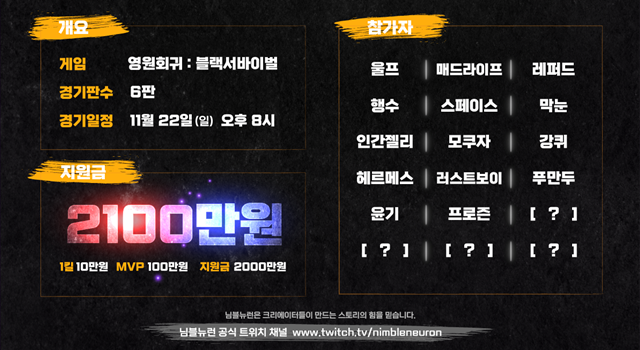

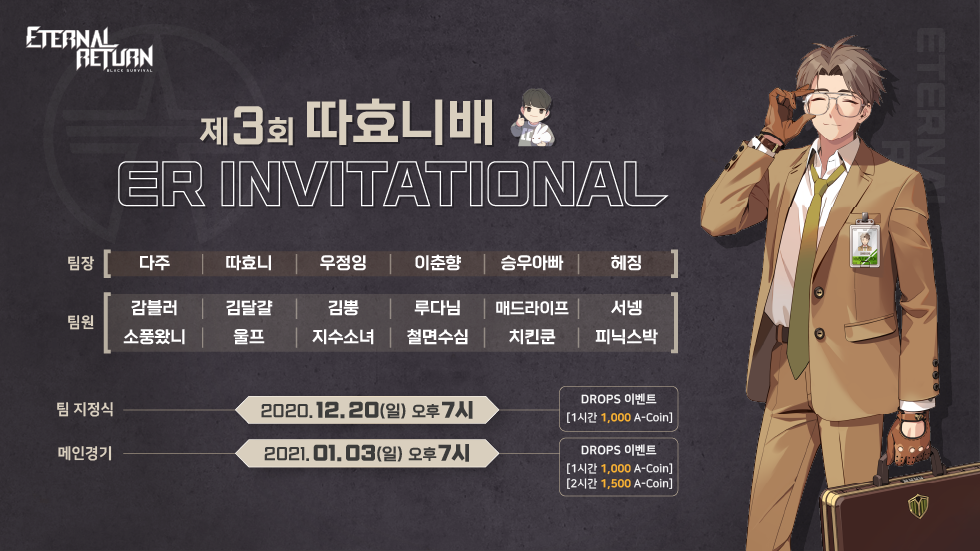

'따효니배 ER 인비테이셔널' 대회 말고도 여러 게임 전프로들을 모아서 연 '영원회귀 프로게이머 파티' 등의 대회를 열때마다 높은 시청자 수를 기록했다. 대회 당일 뿐만 아니라 팀 지정식, 팀 단위 연습때도 4만 ~ 5만 명 정도는 방송을 시청했던 것으로 보인다. 

다만 '따효니배 ER 인비테이셔널' 대회는 2021년 3월 7일 제 5회로 마지막을 맞게 되었고, 님블뉴런은 다른 컨텐츠의 방송을 준비하면서 그 전처럼의 시청자수는 보기 힘들어졌다.

# 동접자 수 하락

물론 블서가 이렇게 항상 좋은 일만 있었던 것은 아니었다. 동접 5만 명 정도를 찍고 서서히 내려가기 시작했는데, 큰 이유는 잠깐 플레이 해보는 소위 '찍먹' 유저 수의 감소, 밸런스, 변수 없는 게임 플레이에 지쳐 떠나는 유저 등이 있을 것이다.

나도 변수 없는 게임의 '노잼성' 에 따라서 게임을 잠깐 접었던 한 명 이다. 매 판 같은 루트, 같은 운영 방법, 폐사 구간 등이 반복되자 매너리즘에 빠진 것이다. 밸런스도 문제가 되었다. 무기 차이, 실험체 간의 상성 문제, 더 나아가 '근거리 공격' 실험체와 '원거리 공격' 실험체의 차이 때문에 커뮤니티는 항상 불탔었다. 그 차이를 좁히고자 원작에서 '숙련도' 라는 시스템을 계승했지만, 몇몇 실험체들이 숙련도마저 씹어먹을 수 있을 정도의 오버밸런스가 되자 하나둘씩 떠나기 시작했다. 

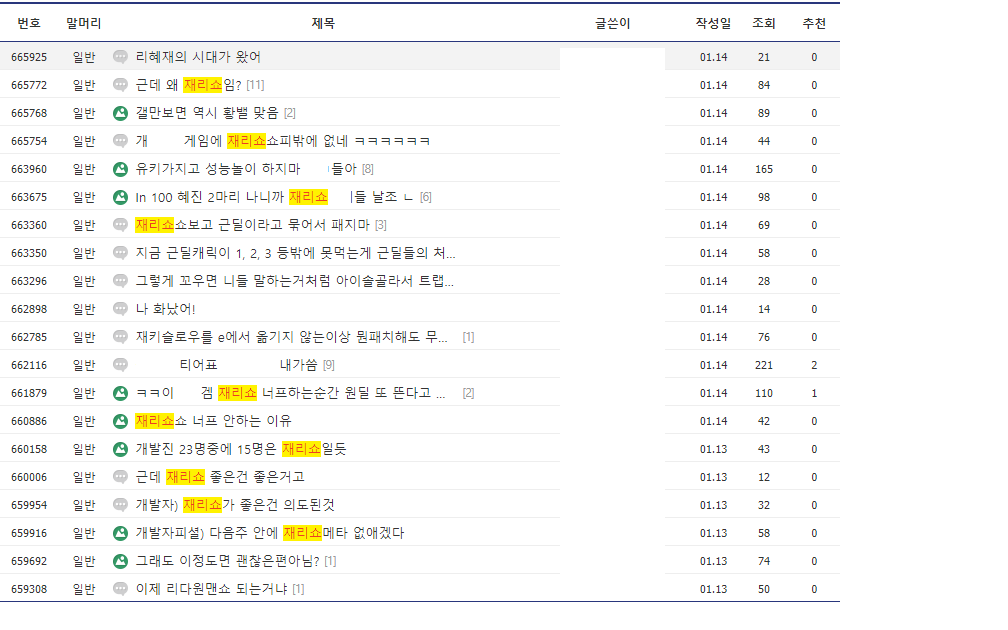
> *재키, 리 다이린, 쇼이치, 쇼우 강점기 시절*

# 지금은...